<a href="https://colab.research.google.com/github/tailorfenil/MLColab/blob/classification/Classification_in_class_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Description:

**Suppose you are a data scientist working for a lending institution that wants to improve its loan approval process. The institution has provided you with a dataset containing information about loans issued by LendingClub, an online lending platform.**


**Your task is to analyze this dataset and develop a machine learning model that can accurately predict whether a loan application should be approved or not.**


**By accurately predicting loan approval outcomes, your model will assist the lending institution in making informed decisions, reducing the risk of default and improving the overall loan portfolio performance.**


**This will not only streamline the loan approval process but also enable the institution to better assess the creditworthiness of loan applicants, leading to more sound lending practices.**

In [ ]:
#data taken from https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans

Mounted at /content/mydrive


# Importing the Libararies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Upload data to colab

In [ ]:
!ls

sample_data


#upload the data provided to you into colab from file ->

In [ ]:
import pandas as pd
# Reading the csv
df = pd.read_csv('/content/lc_loan.csv')
df.head()

<ipython-input-3-d01d35b7c6c9>:3: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/mydrive/MyDrive/TA_DEB/lc_loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Introduction

Let's see what features we got from the data. We need to analyse the features

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

We have around 65-70 features when the id and prediction columns are removed

In [ ]:
df.shape

(887379, 74)

In [ ]:
df.isna().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64

Calculating the percentage of missing value in the data

Let's see how much missing values are there

In [ ]:
# Calculate the percentage of missing values in df_read
percentage_missing = df.isnull().sum() / len(df) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
new_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.799326,5.051393,0.0,0.000451,0.0,0.0,0.0,0.0,0.0,85.797726,0.0,0.017129,0.0,0.0,0.0,0.003268,0.003268,0.003268,51.197065,84.555303,0.003268,0.003268,0.0,0.056571,0.003268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.990018,0.0,28.507661,0.005973,0.01634,75.015974,0.0,0.0,99.942415,99.94264,99.942415,0.003268,7.919502,7.919502,97.591559,97.591559,97.591559,97.591559,97.654892,97.591559,97.902024,97.591559,97.591559,97.591559,97.591559,7.919502,97.591559,97.591559,97.591559


Missing values can have a significant impact on the performance and reliability of machine learning models.

How to handle the missing value that is completely dependent on the problem you have.

Here, we will keep only those features which has less than of 20% missing values.

In [ ]:
# Keeping only those features with less than 20% of missing values
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 20)].to_list()
print("Total features before:",len(df.columns))
print("Total features now:",len(features_to_keep))

Total features before: 74
Total features now: 52


Only keeping those features with lees than of 20% missing value

In [ ]:
df1=df[features_to_keep]
df1.shape

(887379, 52)

List of 21 features

In [ ]:
features=['loan_amnt','term', 'int_rate', 'installment', 'grade', 'sub_grade','emp_length','home_ownership',
                'annual_inc','verification_status','purpose','dti','delinq_2yrs','inq_last_6mths','open_acc',
                'pub_rec','revol_bal','revol_util','total_acc','last_pymnt_amnt','loan_status']
print(len(features))

21


Keeping only those 21 features

In [ ]:
df=df1[features]
print("Shape of the dataset:",df.shape)
df.head()

Shape of the dataset: (887379, 21)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,Fully Paid
1,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,Charged Off
2,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,Fully Paid
3,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,357.48,Fully Paid
4,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,67.79,Current


Checking the unique values of loan_status

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

Checking that particulat that two vlue is present in the loan_status

In [ ]:
target_loan= ["Fully Paid","Charged Off"]
df=df[df["loan_status"].isin(target_loan)]
print(df.shape)

(252971, 21)


**Begin by conducting exploratory data analysis (EDA) to gain insights into the dataset.**

-------------------------------------------------------------------------------

**Visualize the data, calculate summary statistics, and identify any patterns or trends.**

## EDA

Calculating or checking if there is any missing value for features in the data.

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             9897
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              199
total_acc                 0
last_pymnt_amnt           0
loan_status               0
dtype: int64

Filling missing values, also known as imputation, is a common approach to handle missing data in machine learning.

1. Mean/Median/Mode Imputation

2. Forward Fill/Backward Fill

3. Regression Imputation etc.


We can see there are missing valu present in two features in the data.

We will fill those value with mode and median.

In [ ]:
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())

Plot or Visulaize Loan Status count.

Class and count of classes

What we can see from the plot. It's pretty simple status of loans and their counts. Which one is mostly present in the dataset.

Text(0.5, 1.0, 'Loan status count')

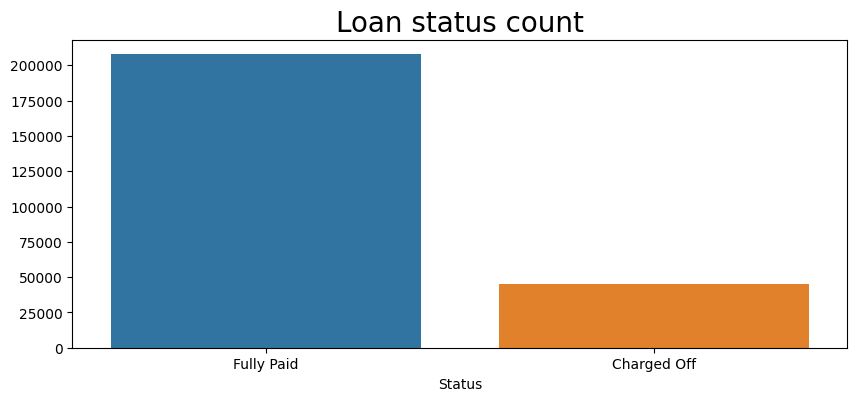

In [ ]:
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_status")
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

We can see that there is an imbalance in the class counts. Fully paid dominates as majority class.

Loan status count VS Length of employment

Let's try to give your inference.

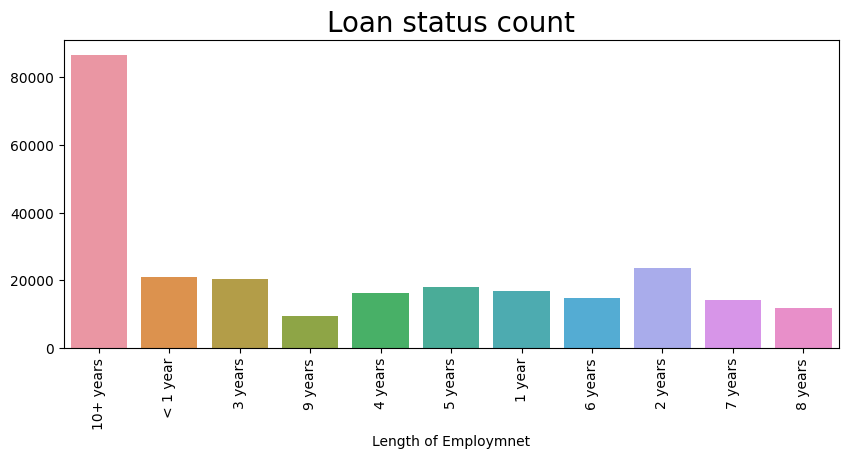

In [ ]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="emp_length")
ax.set(xlabel='Length of Employmnet', ylabel='')
ax.set_title('Loan status count', size=20)
plt.xticks(rotation='vertical')
plt.show()

Most of the loans are of 10+ years. This might be quite informative on what happens for shorter tenure lengths. In general shorter tenure are consider more risky and hence might have higher charged off.

Correlation is a statistical measure that quantifies the relationship between two variables. It measures the extent to which changes in one variable are associated with changes in another variable. Correlation is commonly used in data analysis to understand the strength and direction of the relationship between variables.

Now let's map the correlation between features.

if we take installment and Loan amount. You can see their correlation value
 0.96. So they are highly correlated.

Okay now how they are correlated? Positive or Negative and what does this two means?

So positive correlation means: A high positive correlation indicates that as the feature increases, the other one also tend to increase as well.

Negative Correlation: A high negative correlation indicates that as the feature increases, the other one also tend to decrease.

<ipython-input-19-a41e0b51cacd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


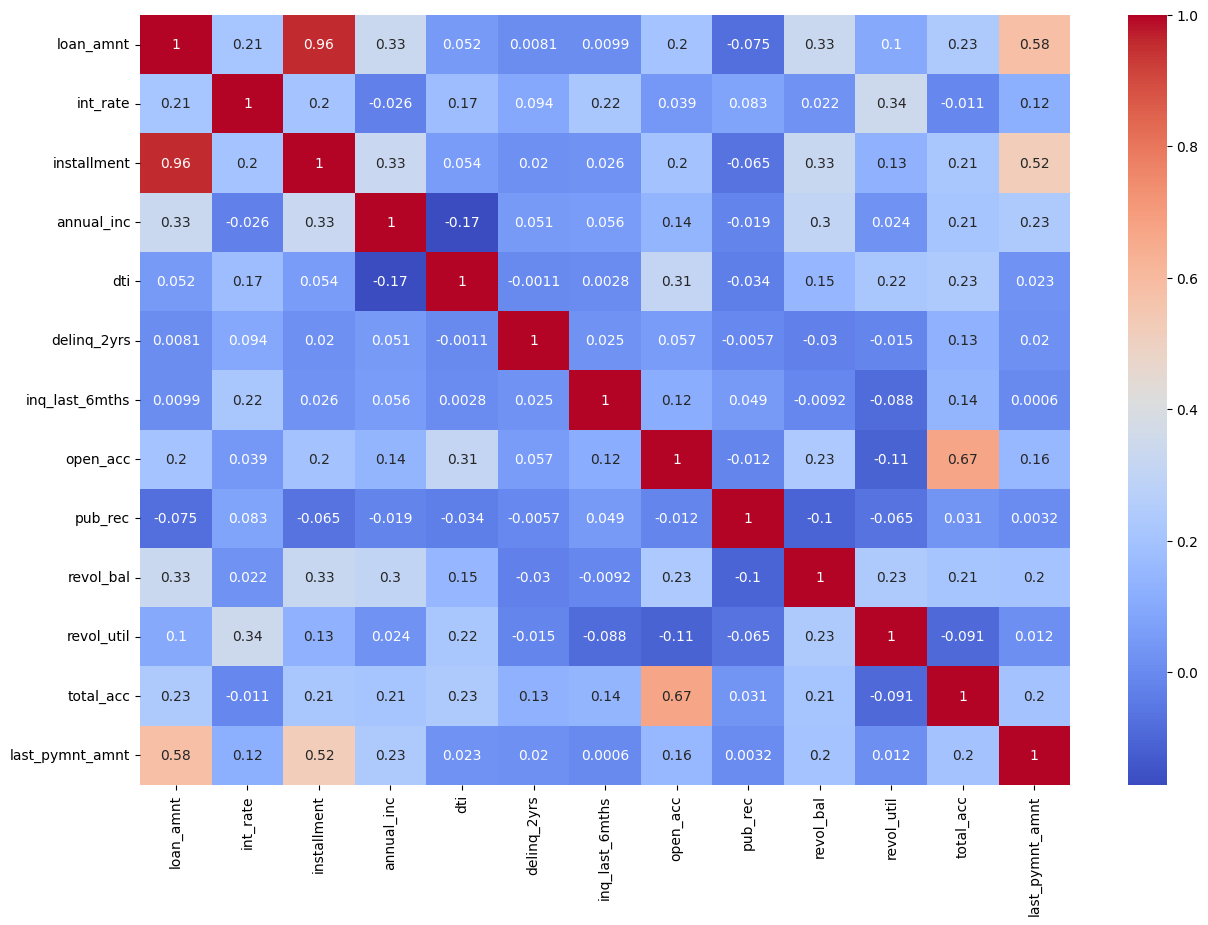

In [ ]:
# Plotting a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

Now we are dividing features into categorical and numerical, so why we will do it? Remember we need to convert categorical to numerical if we wanr to use those categorical features into the ML model

In [ ]:
# Dividing our features into categorical and numerical
categorical=[feature for feature in df.columns if df[feature].dtype=='object']
numerical=[feature for feature in df.columns if feature not in categorical]

A histogram is a graphical representation of the distribution of a dataset. It displays the frequencies or counts of observations within different intervals or bins. A histogram can provide insights into the underlying distribution of a continuous variable and help identify patterns, outliers, or skewness in the data.


we make a list of numerical features. Now we will plot histograms of that feature to look into their ditribution.

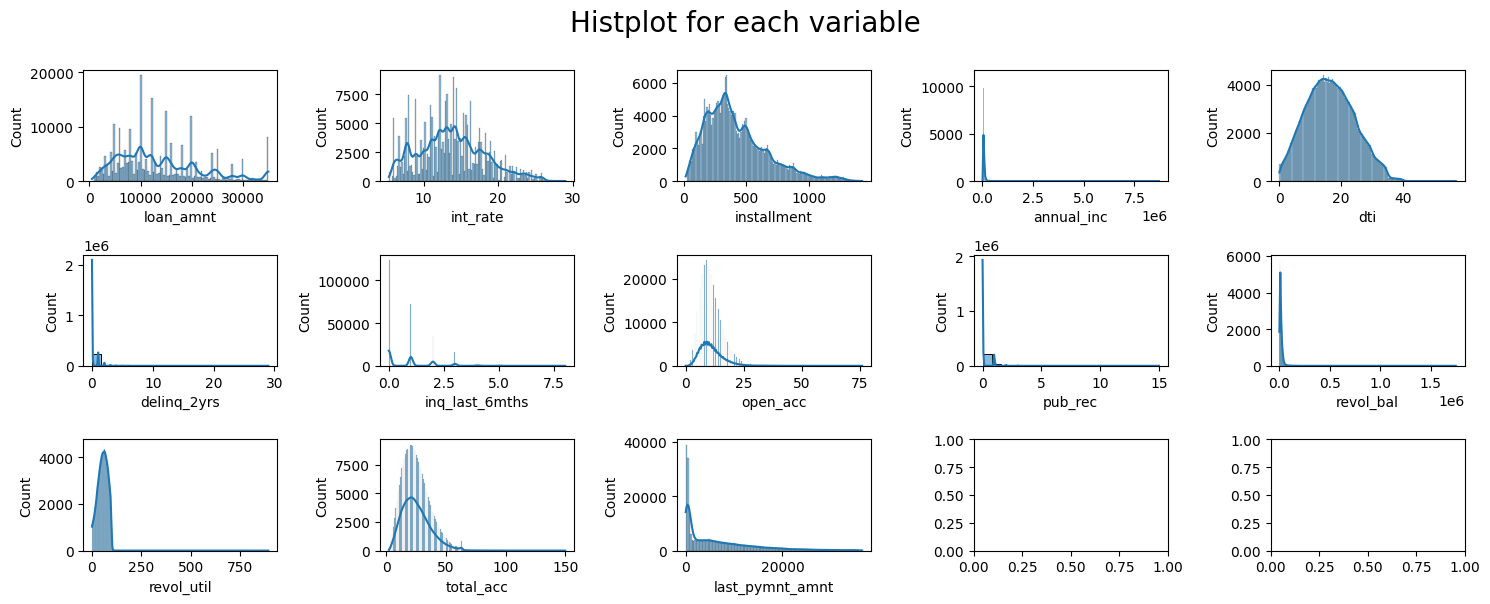

In [ ]:
# Histplot for each variable in numerical list
def histplot_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=df,column=numerical)
plt.tight_layout()

**Preprocess the dataset by handling missing values, addressing categorical variables, and performing any necessary data transformations.**

--------------------------------------------------------------------------------

**This step ensures that the data is in a suitable format for machine learning algorithms.**

## Preprocessing

in 'term' features we got the data as ' 36 months' ' 60 months' etc. we need to make it numeric using lstrip and rstrip.

In [ ]:
# Term column
print("Before:",df['term'].unique())
df['term'] = df['term'].map(lambda x: x.lstrip(' ').rstrip(' months'))
print("After:",df['term'].unique())
df['term']= df['term'].astype('int64')

Before: [' 36 months' ' 60 months']
After: ['36' '60']


same thing we are doing here. '3 years' '9 years to 3, 9

In [ ]:
# emp_length column
print("Before:",df['emp_length'].unique())
df['emp_length']= df['emp_length'].str.replace(r'[a-zA-Z]','')
df['emp_length']= df['emp_length'].str.replace(' ','')
print("After:",df['emp_length'].unique())

Before: ['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years']


<ipython-input-23-46f2ad2a7613>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length']= df['emp_length'].str.replace(r'[a-zA-Z]','')


After: ['10+' '<1' '3' '9' '4' '5' '1' '6' '2' '7' '8']


Label encoding is a technique used to convert categorical variables into numerical representations. In machine learning, algorithms typically require numerical inputs, so label encoding is employed to transform categorical data into a format that can be easily understood by the algorithms.

Encode the Categorical features into numeric value to use those features in the Machine Learning model developement

In [ ]:
# Label Encoding
df['grade']= df['grade'].map({'A':0,'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})

df['sub_grade']= df['sub_grade'].map({'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4,
                                      'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9,
                                      'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14,
                                      'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
                                      'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24,
                                      'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
                                      'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34})

df['emp_length']= df['emp_length'].map({'<1': 0,'1': 1,'2': 2,'3': 3,
                                        '4': 4, '5': 5,'6': 6,'7': 7,
                                        '8': 8,'9': 9, '10+': 10})

df['loan_status']= df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

One-hot encoding is a technique used to convert categorical variables into a binary matrix format, where each category becomes a separate binary feature. It is commonly used in machine learning to represent categorical data in a way that is compatible with various algorithms.



In [ ]:
# One hot encoding
df=pd.get_dummies(data=df,columns=['home_ownership','verification_status','purpose'],drop_first=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36,10.65,162.87,1,6,10,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,2,13,0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,2,14,10,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,36,13.49,339.31,2,10,10,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,357.48,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,5000.0,36,7.90,156.46,0,3,3,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,161.03,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Split the dataset into training and testing sets for model evaluation.**

--------------------------------------------------------------------------------

**Train and evaluate various classification models, such as logistic regression, SVM etc. Compare the performance of these models to identify the most accurate one for loan approval prediction.**

--------------------------------------------------------------------------------

**Fine-tune the selected model by adjusting hyperparameters. Use techniques like regularization.**

training dataset only with features which is X and target feature as y

In [ ]:
# Dividing our dataset into independent and dependent features
X=df.drop('loan_status',axis=1)
y=df['loan_status']

Splitting our dataset.

In [ ]:
# Splitting our dataset between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

Transforming the dataset. We are using minmax scalar to normalize the feature.

Okay so why we normalize?
The MinMaxScaler is a common feature scaling technique used in machine learning. It scales features to a specified range, typically between 0 and 1. The main reason for using MinMaxScaler is to ensure that all features have the same scale and to bring the data within a specific range.

as we saw from the distribution plot the data has various range and the distribution is different. We are mapping all those into a single range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df['loan_status'].value_counts()

0    207723
1     45248
Name: loan_status, dtype: int64

# Model

**Logistic Regression**

We are training our first model Logistic regression with one iteration. First we are fitting the data to learn. Then we are predicting on the test data whatever our model has learned from the training data.

We are trying to learn the pattern of the training data to predict from unknown data.

here, we got the accuracy as 82%.

In [ ]:
# Fit a logistic regression model to the training data
model = LogisticRegression(random_state = 42, max_iter = 1)
model.fit(X_train, y_train)

# Predict the rise and fall of crypto on the testing data
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8224625650269595


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Suppose we are not satisfied with our models performance. May be it can underfit or overfit the data. we need more accuracy. So how we can improve the model?

Here regularization comes into the field. here we are using l2 regularization technique with a extra parameter that is solver. Now what solver is doing??

So as we know: L2 regularization, also known as Ridge regularization, is a commonly used technique in machine learning to prevent overfitting and improve the generalization performance of models. It accomplishes this by adding a penalty term to the loss function during the training process.

Solver is nothing bu a optimization tecchnique. Different solvers employ different optimization techniques to minimize the cost function or maximize the likelihood function associated with logistic regression. The choice of solver can impact the efficiency and accuracy of the model's training process.

Here we use l2 as penalty and newton-cholesky as solver. lets see if it is increase our accuracy

In [ ]:
# Fit a logistic regression model to the training data
model2 = LogisticRegression(penalty='l2', solver = 'newton-cholesky')
model2.fit(X_train, y_train)

# Predict the rise and fall of crypto on the testing data
y_pred = model2.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8918773619214775


model 2 is performing better than model 1 by using those parametrs.

Now try some more different parameter. We are using l2 with 'sag' and the iteration is now 200.

What we can see that there is no improvement in the model 3. Its okay to go with the model 2.

In [ ]:
# Fit a logistic regression model to the training data
model3 = LogisticRegression(penalty='l2', solver = 'sag', max_iter = 200)
model3.fit(X_train, y_train)

# Predict the rise and fall of crypto on the testing data
y_pred = model3.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8918141138149677


**Polynomial Features**

We have tried with our preprocessed features already. Okay now what if tried with some other kind of features. So let's make them ploynomial.

then fit into the logistic reg model with penalty term, iteration and solver.

In [ ]:
from sklearn.pipeline import make_pipeline
# Create a pipeline with polynomial features and logistic regression
model4 = make_pipeline(PolynomialFeatures(2, include_bias=True), LogisticRegression(penalty='l2', solver = 'saga', max_iter = 50, random_state = 42))

# Fit the model on the training data
model4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression',
                 LogisticRegression(max_iter=50, random_state=42,
                                    solver='saga'))])

Accuracy is increased slightly. Actually too slight. 🙊

In [ ]:
y_test_pred = model4.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_test_pred))


Test Accuracy: 0.8956722483120662


**SVC**

Enough of logistic. Now try some another method or another model.

we are going for support vector machine. New model. 😀



In [ ]:
from sklearn.svm import SVC

Training the model with our training data with a simple paramater C.

Do we know what C does?

Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

You know what is regularization. BINGO!!!

What is accuracy? Here with a simple param and in a single go we got the same accuracy as we got from the model2. That is great!!!


In [ ]:
# Fit SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Make predictions on the training and test sets
test_preds = svm.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.891197444776497


No can we increase the accuracy by using SVC with some more parameter?

let's try it!!!!

Using polynomial kernel with C=1, degree = 2 and gamma = auto.

So what does all this means?

kernel = Specifies the kernel type to be used in the algorithm.

degree = Degree of the polynomial kernel function (‘poly’). Must be non-negative.

gamma = Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

(https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


ohhhooo!!!! We decrease the accuracy. Let's go with first svm model.

In [ ]:
# Fit SVM model
svm1 = SVC(kernel='poly', C=1, degree = 2, gamma = 'auto')
svm1.fit(X_train, y_train)

# Make predictions on the training and test sets
test_preds = svm1.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.8707050582673181


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Let's try KNN. With 3 neighbour.

No!! accuracy is not good as svm. 😓

In [ ]:
# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

test_preds = knn.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.8534225131635121


Now let's go and try some parameter to see if knn can surpass svm.

We are using neighbour=5 with ball_tree algo.

What is this algorithm parameter doing here? 🤔

algorithm = Algorithm used to compute the nearest neighbors

(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


Okay, so we didn't reach that level of svm with KNN here. May be bad luck!!

In [ ]:
# Adding some extra parameter:
# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'ball_tree')
knn.fit(X_train, y_train)

test_preds = knn.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.8623721202346505


**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

Looked into the models with parameters. You can try gaussian naive bayes.

In [ ]:
# Fit Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

test_preds = nb.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.8639375108707683


**Naive Bayes classifier for multivariate Bernoulli models**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV

Using the bernoulli models.

In [ ]:
# Fit Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

test_preds = bnb.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.8244074443021362


Okay!!

so what is this now?
If we are trying to put some extra parameter in the model and train it then put another into the model and again retrain it. It will take a lot of time to finalise or identify those parameter for which we have got the highest accuracy. 😓

Here many things comes into the field. Let's try one of them.

Model will be bernoulli. To search the best hyper parameter for this model we will use girdsearchcv.

What is that means? 😶

Finding the best combination of hyperparameters for a machine learning model. It performs an exhaustive search over a predefined grid of hyperparameter values and evaluates the model's performance for each combination.


Here we found the best parameter and accuracy using that also. That is also not good as svm model.

what can we do now?
we all need to try this search for best parameter for the svm model. Let's try and let us know what did you find?

In [ ]:
# Define the hyperparameters to tune and the range of values to try
params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Create a Bernoulli Naive Bayes model
bnb = BernoulliNB()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(bnb, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)

# Use the best hyperparameters to fit the model on the training data
best_bnb = BernoulliNB(alpha=grid_search.best_params_['alpha'])
best_bnb.fit(X_train, y_train)

test_preds = best_bnb.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Best Hyperparameters: {'alpha': 1}
Test Accuracy: 0.8244074443021362


Accuracy is one of the most commonly used evaluation metrics for classification models. It measures the proportion of correctly classified instances over the total number of instances in the dataset. While accuracy is an important metric, it is not the only factor to consider when evaluating a classification model.

There are something called confusion matrix, classification report, precision, recall which we can get it from confusion matrix or directly by calling function of python sklearn.

We need to look into it right?

Let's try it by ourselves and let us know what did you understand?

Link: https://medium.com/swlh/confusion-matrix-and-classification-report-88105288d48f

**Now What??**


--------------------------------------------------------------------------------

Assess the model's performance using appropriate evaluation metrics, such as accuracy, precision, recall, and F1-score. This evaluation will provide insights into how well the model can predict loan approval outcomes.
Provide insights and recommendations based on the model's predictions and feature importance. Analyze the impact of different features on loan approval decisions and identify key factors that significantly influence the outcome.


Additionally, prepare a comprehensive report summarizing your findings and recommendations for improving the loan approval process based on the insights gained from the developed model.

Note: Ensure that you apply suitable feature engineering techniques, and use appropriate validation strategies to ensure reliable model performance. Additionally, consider the ethical implications of the model's predictions and address any biases that may arise during the analysis.